In this notebook, I generate Figure 7 in the paper. 

In [1]:
import sys
import pandas as pd
import numpy as np
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_LrLx_data import *
from clustering import *

# With Interpolated Data: Only BH detections 

In [2]:
## Get the data
df = get_all_LrLx_data_filtered(names = None, interp=True, rerun = False, save=False, incl_Fx_uplims = False, incl_Fr_uplims = False, type_source= "BH")
Lr = df["Lr"].to_numpy()
Lx = df["Lx"].to_numpy()
print("Number of data points:", len(Lr))

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']
Sources included after filtering:  ['4U 1543-47' '4U 1630-47' 'EXO 1846-031' 'GRS 1739-278' 'GX 339-4'
 'H1743-322' 'IGR J17091-3624' 'MAXI J1348-630' 'MAXI J1631-479'
 'MAXI J1803-298' 'MAXI J1810-222' 'MAXI J1820+070' 'Swift J1727.8-1613'
 'Swift J1842.5-1124']
Number of data points: 195


In [3]:
df[df["name"] == "MAXI J1631-479"].head(1)

,t,t_diff,Fx,Fx_unc_l,Fx_unc_u,Fx_uplim_bool,name,blockID,band,dt_radio,...,Fr_uplim_bool,state,class,D,D_prob,Lr,Lr_unc,Lx,Lx_unc_l,Lx_unc_u
275,58509.3506,0.0,5.740412e-08,8.169869e-09,9.730736e-09,False,MAXI J1631-479,1548489789,L,0.010185,...,False,HS,candidateBH,5.0,"(""uniform"", 4.5, 8.5)",2.634754e+29,1.674698e+28,1.717453e+38,2.444313e+37,2.911303e+37


In [4]:
df_4u = df[df["name"] == "4U 1543-47"]
print(len(df_4u))

13


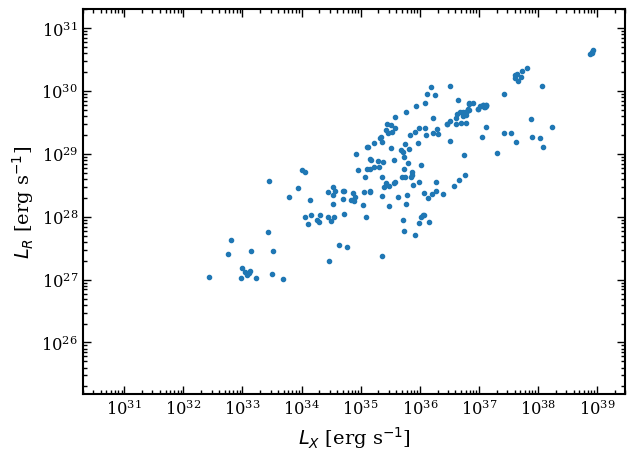

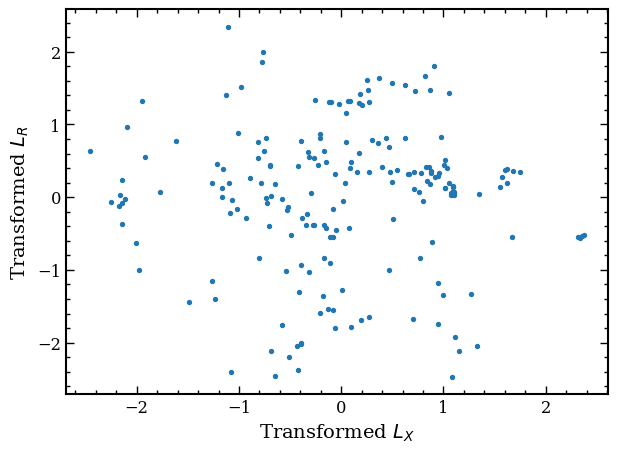

In [5]:
## Original data
data = np.column_stack((Lx, Lr))
plotLrLx(data)

## Transformed data
transformed_data = transform1(data)
plotLrLx_tranformed(transformed_data)


### Run affinity propagation:

Estimated number of clusters: 2
Silhouette Coefficient: 0.512


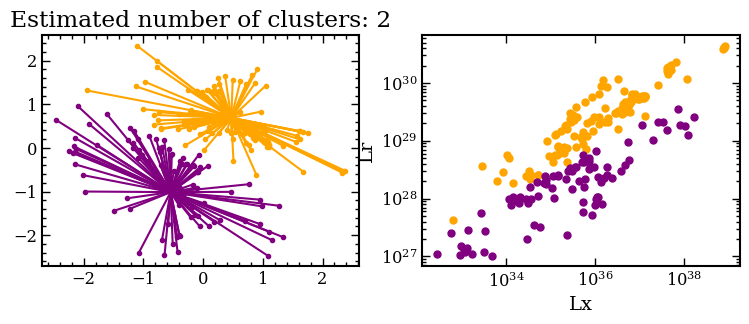

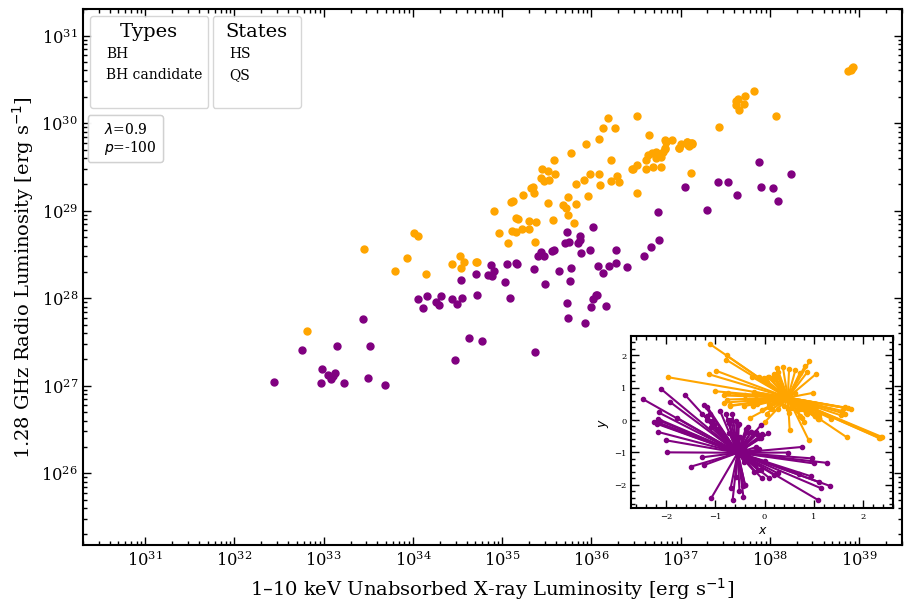

Estimated number of clusters: 3
Silhouette Coefficient: 0.577


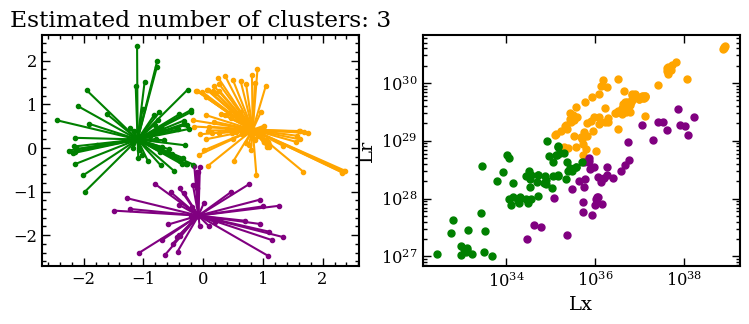

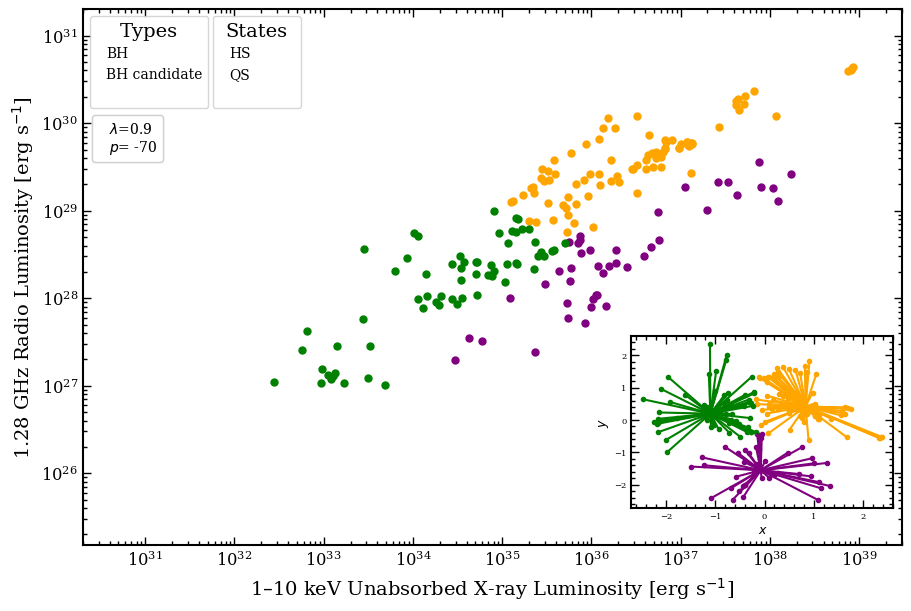

In [6]:
# Affinity Propagation Clustering, with preference = -100 and damping = 0.9
_ = affinity_propagation(data, transformed_data, preference=-100, damping =0.9, save_name="clustering_params1")

# Affinity Propagation Clustering, with preference = -70 and damping = 0.9
_ = affinity_propagation(data, transformed_data, preference=-70, damping =0.9, save_name="clustering_params2")